In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)




2.8.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
train_images.shape



(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape


(10000, 28, 28)

In [ ]:
len(test_labels)


10000

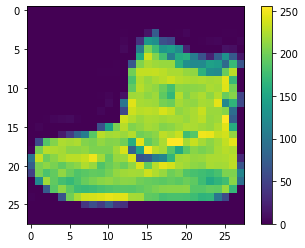

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 0.~1.으로 변형

train_images = train_images / 255.0
test_images = test_images / 255.0

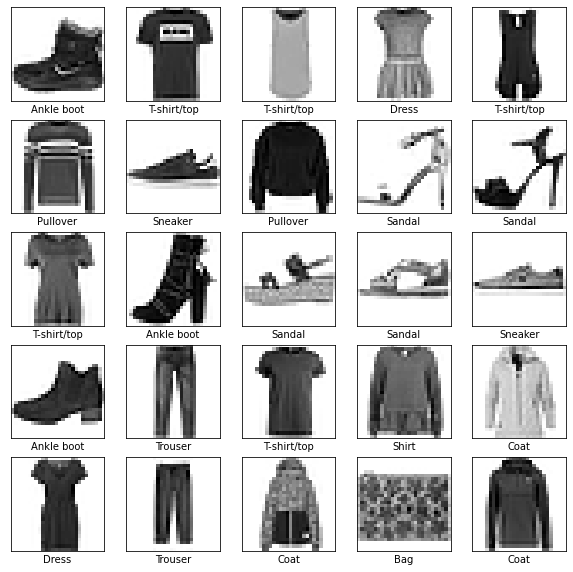

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#MLP 작업중 
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

#CNN과의 작업에서 가장 다른 부분. 이미지 인풋 설정할때 여기는 (28,28)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_images,
         train_labels,
         batch_size=16,
         epochs=10,
         validation_split = 0.2)

Epoch 1/10
3000/3000 [==============================] - 12s 3ms/step - loss: 0.5031 - accuracy: 0.8225 - val_loss: 0.4098 - val_accuracy: 0.8566
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3772 - accuracy: 0.8638 - val_loss: 0.3691 - val_accuracy: 0.8686
Epoch 3/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3371 - accuracy: 0.8764 - val_loss: 0.3394 - val_accuracy: 0.8792
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3146 - accuracy: 0.8843 - val_loss: 0.3589 - val_accuracy: 0.8745
Epoch 5/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2972 - accuracy: 0.8902 - val_loss: 0.3280 - val_accuracy: 0.8832
Epoch 6/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2824 - accuracy: 0.8949 - val_loss: 0.3346 - val_accuracy: 0.8833
Epoch 7/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2682 - accuracy: 0.8996 - val_loss: 0.3433 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3538 - accuracy: 0.8806 - 764ms/epoch - 2ms/step

Test accuracy: 0.8805999755859375


In [ ]:
import pathlib

import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers


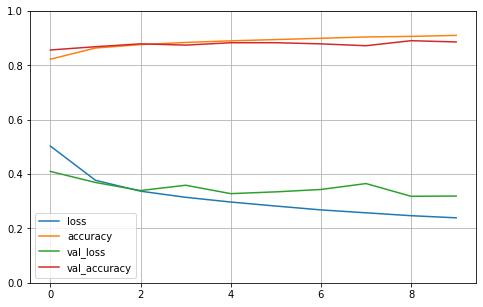

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([5.4423008e-09, 5.2129470e-13, 1.5168746e-13, 2.0654413e-15,
       4.4590465e-10, 3.1252719e-05, 1.4294628e-10, 4.5375447e-03,
       1.7118997e-11, 9.9543118e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

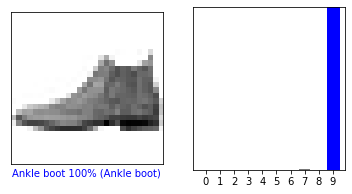

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

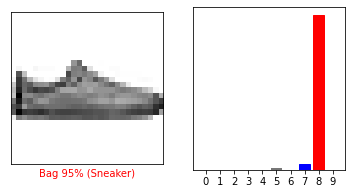

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

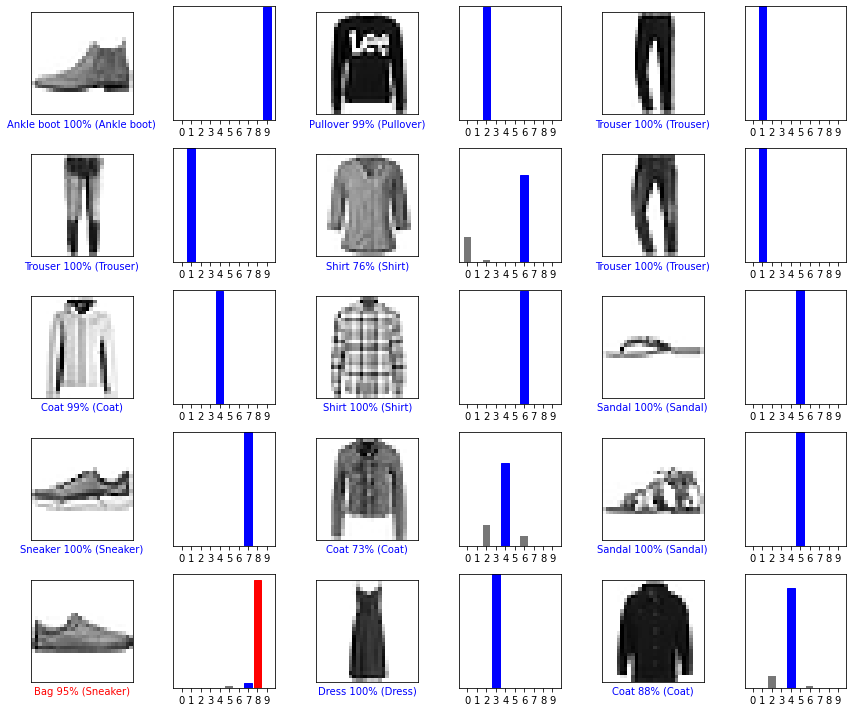

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()